In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Ścieżki do folderów z danymi
train_dir = 'train set'
valid_dir = 'valid set'
test_dir = 'test set'



2023-07-15 19:09:50.274886: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Przygotowanie danych treningowych
train_datagen = ImageDataGenerator(rescale=1./255)  # Przeskalowanie wartości pikseli do zakresu [0, 1]
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Rozmiar obrazów po przeskalowaniu
    batch_size=32,
    class_mode='categorical'  # Kategoryczne kodowanie etykiet
)

# Przygotowanie danych walidacyjnych
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Przygotowanie danych testowych
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)



Found 9396 images belonging to 3 classes.
Found 290 images belonging to 3 classes.
Found 290 images belonging to 3 classes.


Wykorzystujemy ImageDataGenerator do przeskalowania wartości pikseli obrazów treningowych. Następnie tworzymy generator danych treningowych (train_generator), który będzie losowo generował partię obrazów o rozmiarze 32 z folderu train_dir i przeskaluje ich rozmiar do 150x150 pikseli.
Podobnie, przygotowujemy generatory danych walidacyjnych i testowych.

In [3]:
# Definicja modelu
model = Sequential()

# Dodanie warstw konwolucyjnych
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

# Dodanie warstw gęsto połączonych
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 wyjścia dla trzech rzędów ptaków

# Kompilacja modelu
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Wyświetlenie podsumowania modelu
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

W tym kroku definiujemy sekwencyjny model sieci neuronowej (Sequential) i dodajemy kolejne warstwy. Nasz model składa się z warstw konwolucyjnych (Conv2D), warstw redukcji próbkowania (MaxPooling2D) i warstw gęsto połączonych (Dense).
Tutaj kompilujemy nasz model, określając funkcję straty jako 'categorical_crossentropy' (ponieważ mamy 3 klasy), optymalizator jako 'adam' i metrykę oceny jako 'accuracy'.

In [4]:
# Trenowanie modelu
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=20,
                    validation_data=valid_generator,
                    validation_steps=len(valid_generator))



Epoch 1/20


2023-07-15 19:10:42.171487: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


294/294 [==============================] - ETA: 0s - loss: 0.8970 - accuracy: 0.5724

2023-07-15 19:13:15.592683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


294/294 [==============================] - 155s 523ms/step - loss: 0.8970 - accuracy: 0.5724 - val_loss: 0.6283 - val_accuracy: 0.7552
Epoch 2/20
294/294 [==============================] - 150s 511ms/step - loss: 0.5813 - accuracy: 0.7587 - val_loss: 0.4671 - val_accuracy: 0.8138
Epoch 3/20
294/294 [==============================] - 153s 519ms/step - loss: 0.4233 - accuracy: 0.8316 - val_loss: 0.4155 - val_accuracy: 0.8517
Epoch 4/20
294/294 [==============================] - 147s 500ms/step - loss: 0.3093 - accuracy: 0.8826 - val_loss: 0.3193 - val_accuracy: 0.8759
Epoch 5/20
294/294 [==============================] - 153s 519ms/step - loss: 0.2186 - accuracy: 0.9184 - val_loss: 0.3539 - val_accuracy: 0.8621
Epoch 6/20
294/294 [==============================] - 156s 531ms/step - loss: 0.1389 - accuracy: 0.9482 - val_loss: 0.3665 - val_accuracy: 0.8966
Epoch 7/20
294/294 [==============================] - 169s 573ms/step - loss: 0.0951 - accuracy: 0.9665 - val_loss: 0.5873 - val_accura

2023-07-15 20:00:49.496442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 2s 160ms/step - loss: 0.6610 - accuracy: 0.8931
Validation Loss: 0.66
Validation Accuracy: 89.31%


In [5]:
# Testowanie modelu
loss, accuracy = model.evaluate(test_generator)
print("Test Loss: {:.2f}".format(loss))
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

2023-07-15 20:01:40.147612: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 2s 183ms/step - loss: 0.8809 - accuracy: 0.8828
Test Loss: 0.88
Test Accuracy: 88.28%


In [6]:
# Ocena wydajności modelu na danych walidacyjnych
loss, accuracy = model.evaluate(valid_generator)
print("Validation Loss: {:.2f}".format(loss))
print("Validation Accuracy: {:.2f}%".format(accuracy * 100))

/var/folders/rr/3tz5xt4j16s1wvxsg7zr8hg80000gn/T/ipykernel_4476/774763960.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy = model.evaluate_generator(valid_generator)
2023-07-15 20:01:55.116236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Loss: 0.66
Accuracy: 89.31%


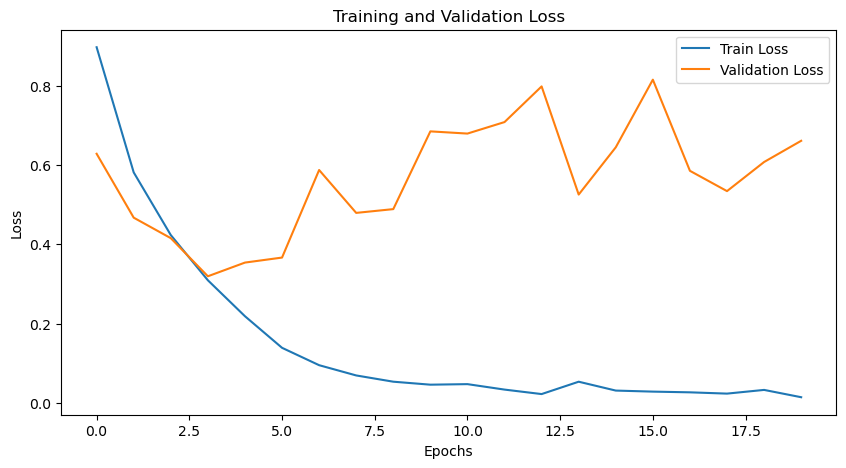

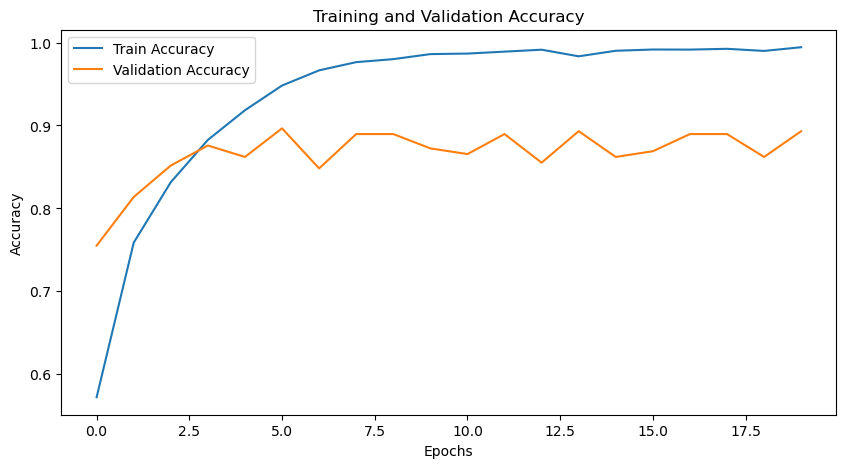

In [12]:
import matplotlib.pyplot as plt

# Wizualizacja krzywych uczenia
def plot_learning_curves(history):
    # Loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_learning_curves(history)

In [7]:
import numpy as np
# Predykcja na nowych danych
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes

2023-07-15 20:02:10.226005: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 2s 172ms/step


In [8]:
# Obliczenie dokładności (accuracy)
accuracy = np.mean(predicted_labels == true_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Obliczenie macierzy pomyłek
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

Accuracy: 33.10%


In [13]:
# Wizualizacja macierzy pomyłek
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

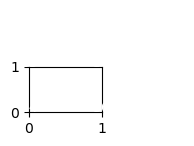

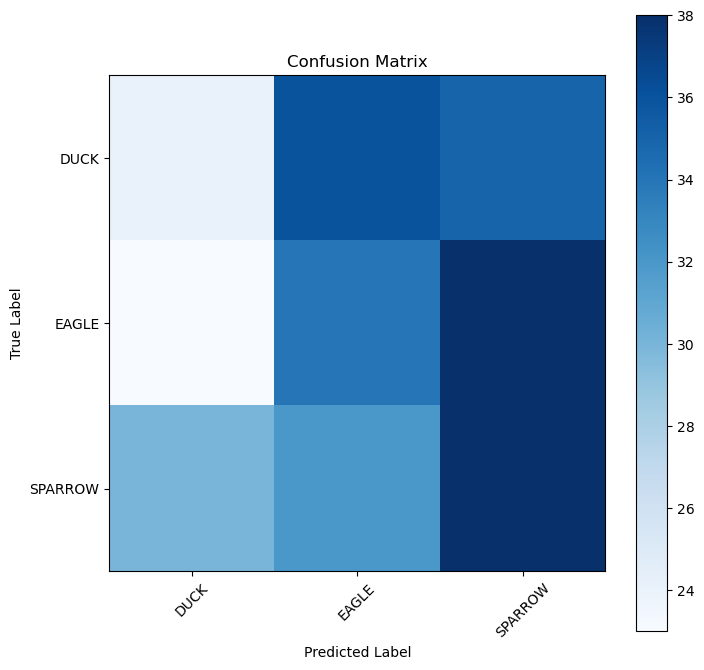

In [16]:
 # Dodanie wartości do macierzy pomyłek
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

plot_confusion_matrix(cm, target_names)

In [10]:
# Obliczenie precyzji, czułości i miary F1
from sklearn.metrics import classification_report
target_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=target_names))


Classification Report:
              precision    recall  f1-score   support

        DUCK       0.31      0.25      0.28        95
       EAGLE       0.33      0.36      0.35        95
     SPARROW       0.34      0.38      0.36       100

    accuracy                           0.33       290
   macro avg       0.33      0.33      0.33       290
weighted avg       0.33      0.33      0.33       290



In [18]:
duck_indices = np.where((true_labels == test_generator.class_indices['DUCK']) & (predicted_labels == test_generator.class_indices['DUCK']))
eagle_indices = np.where((true_labels == test_generator.class_indices['DUCK']) & (predicted_labels == test_generator.class_indices['EAGLE']))
sparrow_indices = np.where((true_labels == test_generator.class_indices['DUCK']) & (predicted_labels == test_generator.class_indices['SPARROW']))

num_correct_duck = len(duck_indices[0])
num_incorrect_eagle = len(eagle_indices[0])
num_incorrect_sparrow = len(sparrow_indices[0])

print("Correctly classified 'duck' images:", num_correct_duck)
print("Incorrectly classified 'duck' images as 'eagle':", num_incorrect_eagle)
print("Incorrectly classified 'duck' images as 'sparrow':", num_incorrect_sparrow)


Correctly classified 'duck' images: 24
Incorrectly classified 'duck' images as 'eagle': 36
Incorrectly classified 'duck' images as 'sparrow': 35


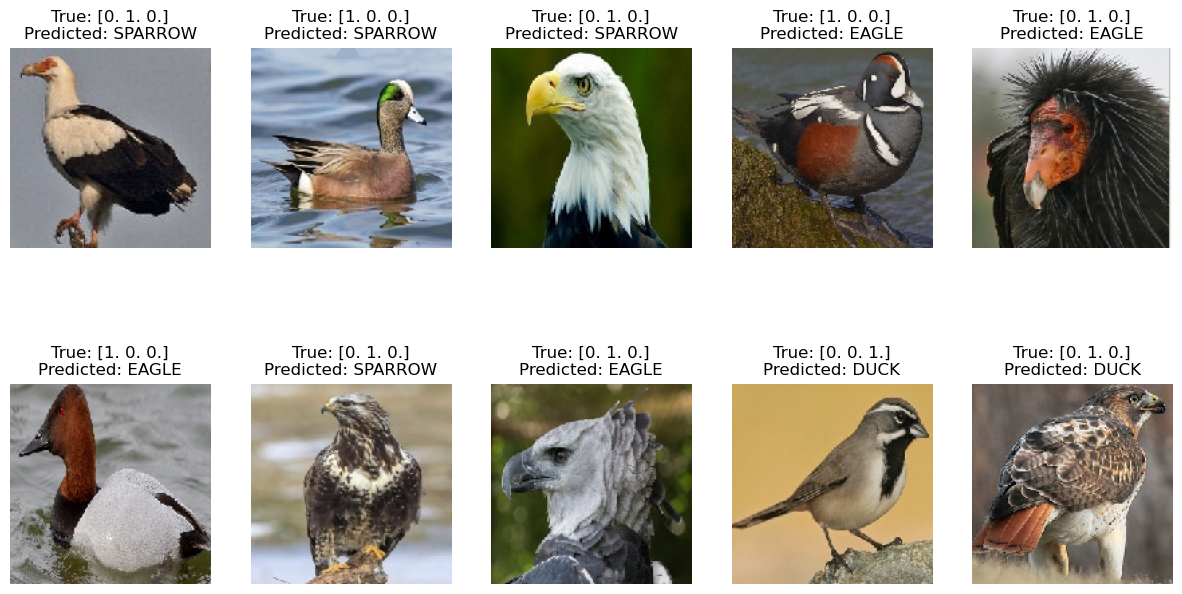

In [19]:
import random
import matplotlib.pyplot as plt

# Wybór 10 losowych indeksów przykładowych obrazów
random.seed(42)
sample_indices = random.sample(range(len(true_labels)), 10)

# Wyświetlenie przykładowych obrazów wraz z ich zaklasyfikowanymi etykietami
plt.figure(figsize=(15, 8))
for i, index in enumerate(sample_indices):
    img = test_generator[i][0][0]  # Przykładowy obraz
    true_label = test_generator[i][1][0]  # Prawdziwa etykieta
    predicted_label = target_names[predicted_labels[index]]  # Zakwalifikowana etykieta przez model

    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
    plt.axis('off')

plt.show()
